<div style="text-align: center;">

## Técnicas de Optimización y Control

## Caso práctico
## 3º Ingeniería Matemática

</div>


Los economistas del Banco Central Europeo han ajustado los datos de variación de
la tasa de ahorro de las familias (%ΔTasa de ahorro) en función de la variación de
PIB (%ΔPIB) y la variación del consumo de los hogares (%ΔCH) en función del
tiempo t en trimestres. Todas las tasas de variación son inter-trimestrales. Si
consideramos, para simplificar el problema, que x=%ΔPIB e y=%ΔCH, la ecuación a
optimizar es:


$$
\% \Delta \text{Tasa de ahorro} = J = \int \left[ (1 + t^2) \cdot (\Delta PIB_t) + (\Delta CH_t) + \left( \frac{\partial \Delta PIB_t}{\partial t} \right)^2 + \left( \frac{\partial \Delta CH_t}{\partial t} \right)^3 \right] \, dt
$$

$$
\% \Delta \text{Tasa de ahorro} = J = \int \left[ (1 + t^2) \cdot x(t) + y(t) + \left( \frac{\partial x(t)}{\partial t} \right)^2 + \left( \frac{\partial y(t)}{\partial t} \right)^3 \right] \, dt
$$



a) Mediante el cálculo de variaciones calcular las curvas óptimas de PIB y de CH
en función de t (en función de las constantes de integración), que optimizan
el problema.

In [18]:
import sympy as sp

# Definición de variables simbólicas
t = sp.Symbol('t')
C1_x, C2_x = sp.symbols('C1_x C2_x')  # Constantes para x(t)
C1_y, C2_y = sp.symbols('C1_y C2_y')  # Constantes para y(t)

# Definir la ecuación para x(t)
x_prime = sp.integrate((1 + t**2) / 2, t) + C1_x  # x'(t)
x_t = sp.integrate(x_prime, t) + C2_x  # x(t)

# Definir la ecuación para y(t)
y_prime = sp.sqrt(t / 3 + 2 * C1_y)
y_t = sp.integrate(y_prime, t) + C2_y  # y(t)

# Mostrar las funciones
print("x(t):", x_t)
print("y(t):", y_t)


x(t): C1_x*t + C2_x + t**4/24 + t**2/4
y(t): C2_y + 2*(2*C1_y + t/3)**(3/2)


Las funciones son:

###  PIB:
$$
x(t) = C1_x \cdot t + C2_x + \frac{t^4}{24} + \frac{t^2}{4}
$$

###  CH:
$$
y(t) = C2_y + 2 \left(2 C1_y + \frac{t}{3}\right)^{\frac{3}{2}}
$$


Las funciones x(t)  y  y(t)  describen la evolución del PIB y del consumo de los hogares en el tiempo, considerando las constantes de integración  C1_x , C2_x ,  C1_y  y C2_y , que se determinan a partir de las condiciones iniciales del problema. Este enfoque permite maximizar la tasa de ahorro de las familias al optimizar la relación entre el PIB y el consumo inter-trimestralmente.


b) Se ha establecido para la simulación que para t=0.5 la tasa de variación del
PIB y del consumo de los hogares es de 0.5%. De igual modo para t=1 las tasas
de variación de PIB y de consumo de los hogares es del 1%. Calcular las
curvas óptimas bajo estas condiciones de contorno. Dibujar las curvas. Nota:
se aconseja usar métodos numéricos, especialmente el método de Newton
Raphson.

In [19]:
# Definir condiciones iniciales para y(t): y(0.5) = 0.5 y y(1) = 1
eq1_y = sp.Eq(y_t.subs(t, 0.5), 0.5)
eq2_y = sp.Eq(y_t.subs(t, 1), 1)

# Resolver para C1_y y C2_y
solution_y = sp.solve([eq1_y, eq2_y], (C1_y, C2_y))

# Asegurarse de que la solución sea válida
if len(solution_y) > 0:
    C1_y_value = solution_y[0][0]  # Primer valor de C1_y
    C2_y_value = solution_y[0][1]  # Primer valor de C2_y
else:
    raise ValueError("No se encontró solución para y(t).")

# Sustituir las constantes en y(t)
y_t_final = y_t.subs({C1_y: C1_y_value, C2_y: C2_y_value})

# Definir condiciones iniciales para x(t): x(0.5) = 0.5 y x(1) = 1
eq1_x = sp.Eq(x_t.subs(t, 0.5), 0.5)  # x(0.5) = 0.5
eq2_x = sp.Eq(x_t.subs(t, 1), 1)      # x(1) = 1

# Resolver para C1_x y C2_x
solution_x = sp.solve([eq1_x, eq2_x], (C1_x, C2_x))

# Asegurarse de que la solución sea válida
if solution_x:
    C1_x_value = solution_x[C1_x]  # Acceder directamente al valor de C1_x
    C2_x_value = solution_x[C2_x]  # Acceder directamente al valor de C2_x
else:
    raise ValueError("No se encontró solución para x(t).")

# Sustituir las constantes en x(t)
x_t_final = x_t.subs({C1_x: C1_x_value, C2_x: C2_x_value})

# Mostrar las constantes y funciones finales
print("Constantes para x(t): C1_x =", C1_x_value, ", C2_x =", C2_x_value)
print("Constantes para y(t): C1_y =", C1_y_value, ", C2_y =", C2_y_value)
print("x(t) final:", x_t_final)
print("y(t) final:", y_t_final)


Constantes para x(t): C1_x = 0.546875000000000 , C2_x = 0.161458333333333
Constantes para y(t): C1_y = 0.375289519592281 , C2_y = -1.25694645694064
x(t) final: t**4/24 + t**2/4 + 0.546875*t + 0.161458333333333
y(t) final: 1.30054278393668*(0.444101574826111*t + 1)**(3/2) - 1.25694645694064


Estas funciones describen cómo evolucionan el PIB y el consumo de los hogares a lo largo del tiempo, de acuerdo con las condiciones de contorno definidas. Este análisis permite optimizar el comportamiento económico intertrimestral de las familias, brindando así una comprensión más clara de la relación entre el PIB y el consumo.

### Las constantes son:

Constantes para  x(t) :
$$
C1_x = 0.546875000000000, \quad C2_x = 0.161458333333333
$$

Constantes para y(t) :
$$
C1_y = 0.375289519592281, \quad C2_y = -1.25694645694064
$$
### Funciones finales:

Función final para x(t) :
$$
x(t) = \frac{t^4}{24} + \frac{t^2}{4} + 0.546875 \cdot t + 0.161458333333333
$$

Función final para y(t) :
$$
y(t) = 1.30054278393668 \cdot \left(0.444101574826111 \cdot t + 1\right)^{\frac{3}{2}} - 1.25694645694064
$$


c) Los economistas necesitan saber si existe un punto $ t^* $ que iguale las curvas de optimización. Demostrar si existe este punto desde un punto de vista gráfico dentro de los intervalos de \( t \) de 0 a 2. ¿Qué significado económico podemos concluir tras este análisis?


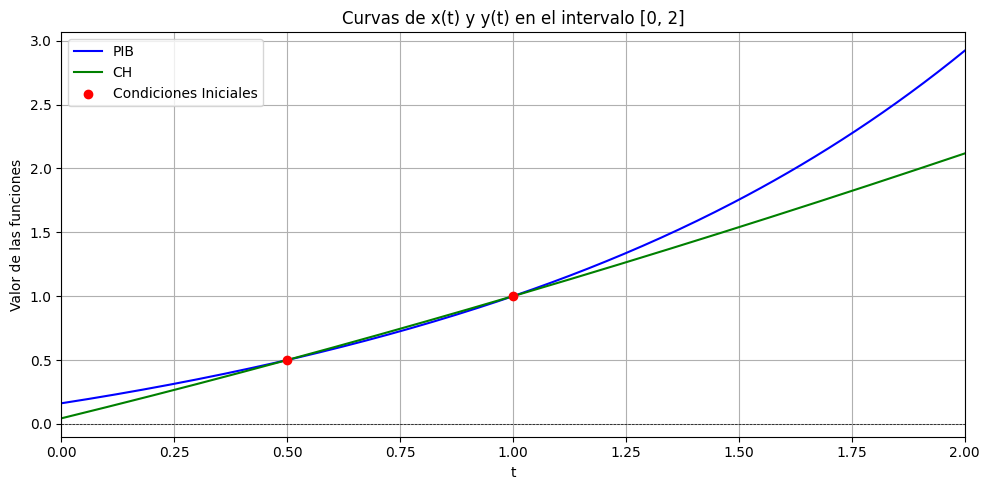

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Crear un rango de valores t para graficar en el intervalo [0, 2]
t_values = np.linspace(0, 2, 200)  # Valores de t de 0 a 2
x_values = [x_t_final.evalf(subs={t: val}) for val in t_values]
y_values = [y_t_final.evalf(subs={t: val}) for val in t_values]

# Graficar ambas funciones en el mismo gráfico
plt.figure(figsize=(10, 5))

# Graficar x(t)
plt.plot(t_values, x_values, label='PIB', color='blue')
# Graficar y(t)
plt.plot(t_values, y_values, label='CH', color='green')

# Marcar las condiciones iniciales
plt.scatter([0.5, 1], [0.5, 1], color='red', zorder=5, label='Condiciones Iniciales')

plt.title("Curvas de x(t) y y(t) en el intervalo [0, 2]")
plt.xlabel("t")
plt.ylabel("Valor de las funciones")
plt.xlim(0, 2)  # Establecer límites en el eje x
plt.grid()
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.legend()
plt.tight_layout()
plt.show()


Correlación entre Consumo y PIB en el Intervalo (0.5, 1)

En el rango entre 0.5 y 1, se observa una correlación casi perfecta entre el consumo y el PIB. Esto significa que durante este intervalo, ambos crecen al mismo ritmo. En particular, en los puntos (0.5, 0.5) y (1, 1) se alcanza un punto de equilibrio, donde el crecimiento del PIB es igual al del consumo. En términos matemáticos, la derivada del PIB y del consumo es prácticamente la misma, lo que indica una relación proporcional y equilibrada entre ambas variables. Este equilibrio implica que, durante este intervalo, las condiciones económicas están sincronizadas, con el consumo reflejando directamente el crecimiento económico.

Desacople después del Punto 1

A partir del punto 1 en la gráfica, se empieza a observar una diferencia importante: el PIB comienza a crecer más rápidamente que el consumo. La pendiente del PIB es más pronunciada, lo que indica un crecimiento más acelerado. Esto puede reflejar una serie de fenómenos económicos, entre ellos, el aumento de la productividad o inversiones que no se traducen inmediatamente en un aumento proporcional del consumo.

Uno de los factores que debe considerarse en este contexto es la inflación. A medida que la economía crece y el PIB aumenta, es probable que también suban los precios. Este incremento de precios implica que, aunque el consumo nominal (la cantidad de bienes y servicios adquiridos) se mantenga, el costo real de los mismos bienes es mayor debido a la inflación. Por lo tanto, la gráfica muestra una pendiente creciente, incluso si los hogares mantienen el mismo nivel de vida. Es decir, el gasto en términos reales puede aumentar solo por el incremento en los precios, lo que lleva a un mayor esfuerzo económico por parte de los hogares para mantener su calidad de vida.

Aplicación a la Microeconomía: Consumo y Ahorro

Desde una perspectiva microeconómica, si asumimos que el consumo es equivalente a los ingresos laborales, podemos interpretar la gráfica como una representación del crecimiento salarial y cómo este afecta al consumo y al ahorro. Al inicio de la gráfica, en los puntos bajos, podríamos imaginar que una persona está ganando un salario modesto (digamos 500 euros). A medida que el salario aumenta, el consumo también sube, permitiendo mejorar la calidad de vida y satisfacer las necesidades básicas.

Sin embargo, llega un punto en el que, aunque los ingresos siguen aumentando, el nivel de consumo no crece a la misma velocidad. Esto se debe a que, una vez cubiertas todas las necesidades, el gasto adicional se reduce. La diferencia entre el aumento de ingresos y el consumo se refleja como ahorro. Este ahorro es fundamental, ya que permite acumular un colchón financiero una vez alcanzada una estabilidad económica.

El Consumo nunca es Negativo

Es importante destacar que el consumo nunca puede ser negativo. Incluso en situaciones en las que el PIB es negativo (es decir, una contracción económica), los hogares seguirán consumiendo lo necesario para cubrir sus necesidades básicas. En este contexto, el ahorro acumulado, que se representa en la gráfica como la diferencia entre el crecimiento del PIB y el consumo, actúa como una red de seguridad que previene una quiebra financiera. Este ahorro es lo que permite que los hogares mantengan su nivel de consumo, incluso cuando la economía atraviesa tiempos difíciles.

In [21]:
import numpy as np

# Definimos las funciones x(t) y y(t) y sus derivadas

def x(t):
    return (t**4)/24 + (t**2)/4 + 0.546875 * t + 0.161458333333333

def y(t):
    return 1.30054278393668 * (0.444101574826111 * t + 1)**(3/2) - 1.25694645694064

def dx_dt(t):
    return (t**3)/6 + t/2 + 0.546875

def dy_dt(t):
    return 0.38499312913494 * (0.444101574826111 * t + 1)**(1/2)

# Definimos la función f(t) y su derivada f'(t)
def f(t):
    return x(t) - y(t)

def df_dt(t):
    return dx_dt(t) - dy_dt(t)

# Método de Newton-Raphson
def newton_raphson(t0, tol=1e-6, max_iter=100):
    t = t0
    for _ in range(max_iter):
        t_next = t - f(t) / df_dt(t)
        if abs(t_next - t) < tol:
            return t_next
        t = t_next
    raise ValueError("No se encontró la raíz dentro del número máximo de iteraciones")

# Punto inicial para Newton-Raphson
t0 = 1.0
t_star = newton_raphson(t0)

print(f"El valor de t* es: {t_star}")


El valor de t* es: 0.9999999999999959


El valor obtenido de 𝑡∗≈1 indica que las funciones que representan las tasas de variación del PIB 𝑥(𝑡) y del consumo de los hogares y(t) se igualan alrededor del primer trimestre. Esto sugiere un punto de equilibrio en la evolución de ambas variables, lo que tiene implicaciones relevantes para el análisis económico.

Desde el punto de vista económico, este equilibrio refleja una sincronización entre el crecimiento del PIB y el consumo en el trimestre 1, lo que podría interpretarse como un momento de estabilidad económica. En este punto, la producción total de bienes y servicios (PIB) y el gasto de los hogares (consumo) crecen a la misma tasa, lo que sugiere un balance en las dinámicas de crecimiento económico.